In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import random

import warnings

warnings.filterwarnings(action='ignore')

path = '/opt/ml/input/data/' # 환경에 맞게 바꿔주시면 됩니다.

train = pd.read_csv(path + 'train_data.csv')
test = pd.read_csv(path + 'test_data.csv')

print(len(set(train['userID'].unique()) - set(test['userID'].unique())))
print(len(set(train['userID'].unique())))
print(len(set(test['userID'].unique())))

6698
6698
744


In [5]:
dat = pd.concat([train, test])
dat = dat[dat['answerCode'] >= 0]
dat.shape[0]

2525956

In [35]:
print(dat['userID'].value_counts().max())
print(test['userID'].value_counts().min())
print(dat['userID'].value_counts().min())

1860
15
9


In [41]:
print(dat['assessmentItemID'].value_counts().max())
print(dat['assessmentItemID'].value_counts().min())

500
46


In [32]:
test['userID'].value_counts()

584     1620
1348    1379
260     1335
617     1333
203     1318
        ... 
5965      15
7033      15
7404      15
7416      15
7417      15
Name: userID, Length: 744, dtype: int64

In [7]:
dat['Timestamp'] = pd.to_datetime(dat['Timestamp'])
dat['month'] = dat['Timestamp'].dt.month
dat.groupby('month')['answerCode'].mean().sort_values()

month
12    0.497527
11    0.507171
5     0.643466
4     0.650392
6     0.652225
8     0.657521
7     0.666357
9     0.670192
10    0.670603
3     0.681989
2     0.686131
1     0.706633
Name: answerCode, dtype: float64

([<matplotlib.axis.XTick at 0x7fde8ec3f1f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

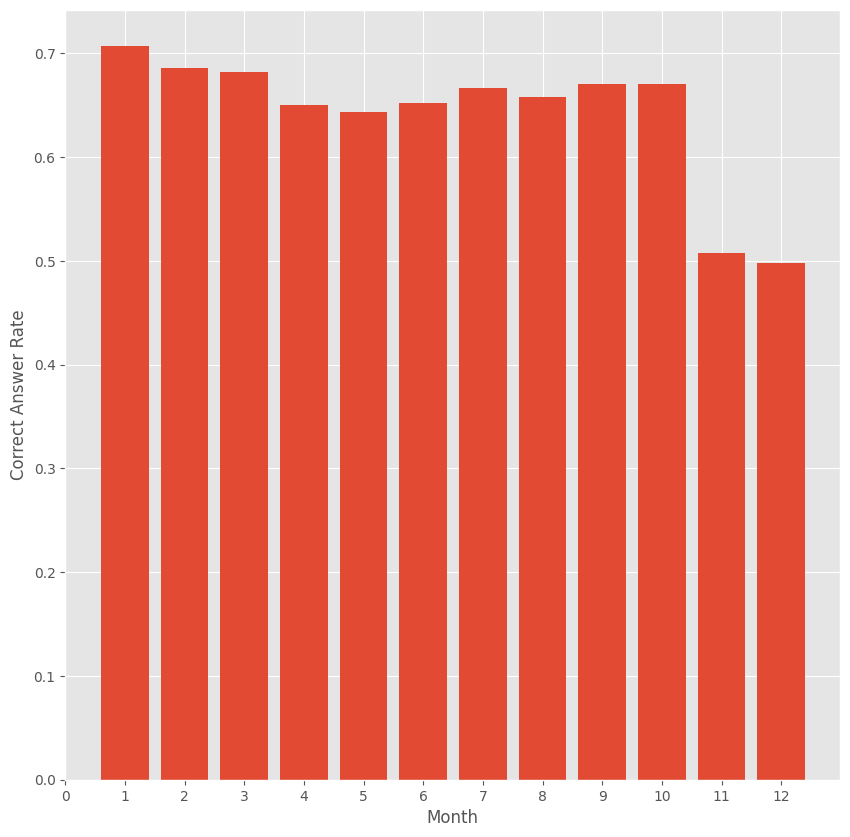

In [16]:
mpl.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))
months = dat.groupby('month')['answerCode'].mean()
plt.bar(months.index, months)
ax.set_xlabel('Month')
ax.set_ylabel('Correct Answer Rate')
plt.xticks(np.arange(0, 13, 1), np.arange(0, 13, 1))

Text(0, 0.5, 'Correct Answer Rate')

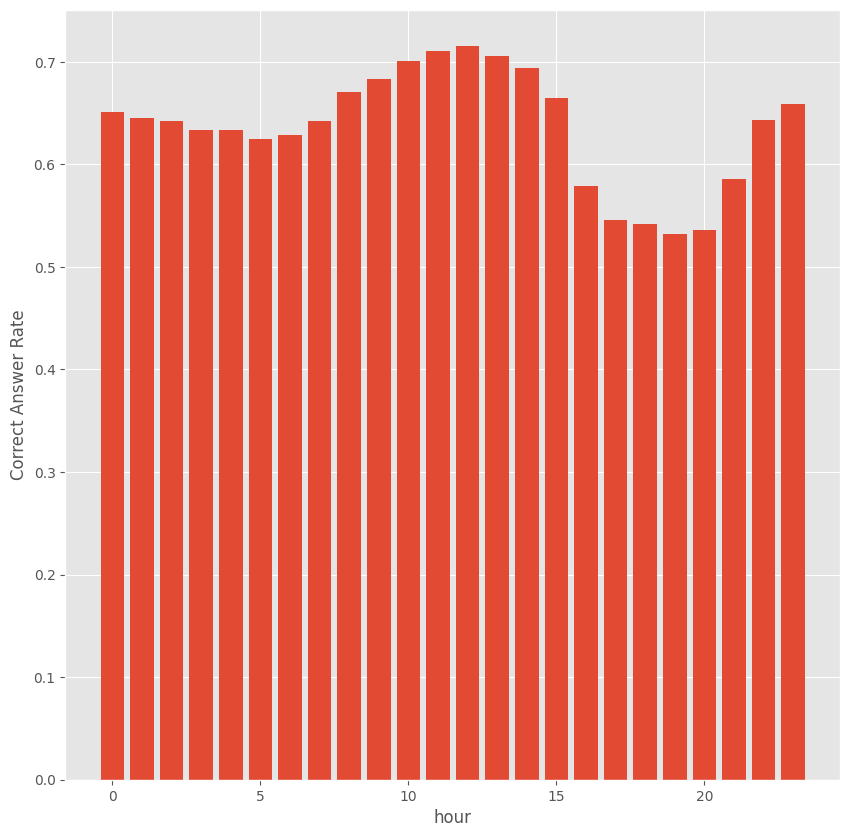

In [19]:
dat['hour'] = dat['Timestamp'].dt.hour

fig, ax = plt.subplots(figsize=(10, 10))
hours = dat.groupby('hour')['answerCode'].mean()
plt.bar(hours.index, hours)
ax.set_xlabel('hour')
ax.set_ylabel('Correct Answer Rate')
#plt.xticks(np.arange(0, 13, 1), np.arange(0, 13, 1))

In [22]:
dat['assessmentItemID'].str[0].unique()

array(['A'], dtype=object)

Text(0, 0.5, 'Correct Answer Rate')

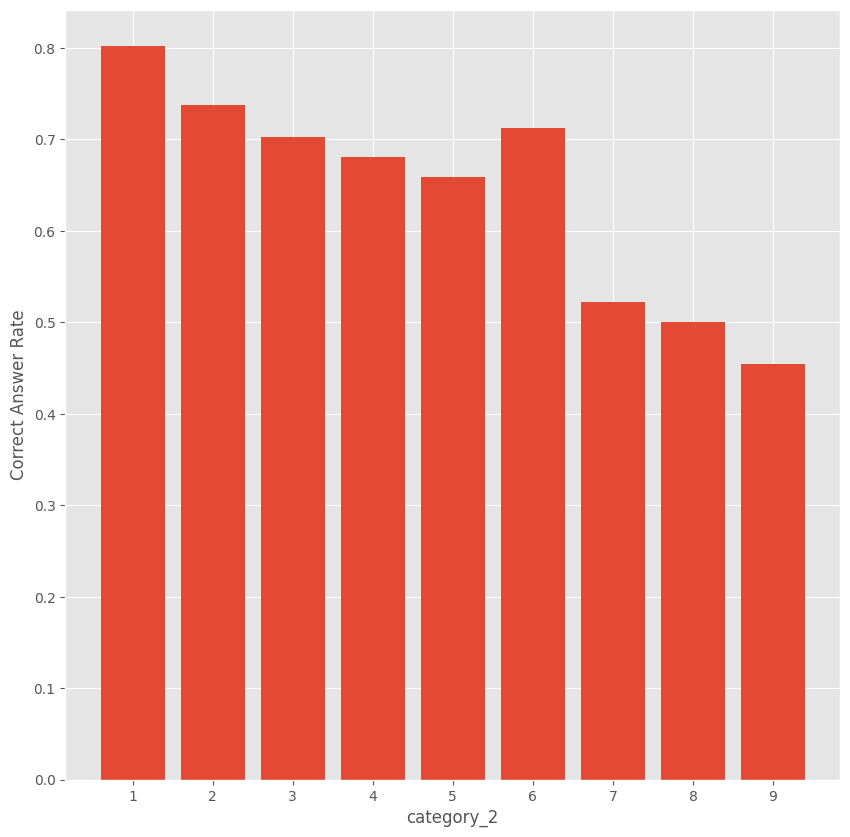

In [28]:
dat['category_2'] = dat['assessmentItemID'].str[2]
fig, ax = plt.subplots(figsize=(10, 10))
category_2 = dat.groupby('category_2')['answerCode'].mean()
plt.bar(category_2.index, category_2)
ax.set_xlabel('category_2')
ax.set_ylabel('Correct Answer Rate')

Text(0, 0.5, 'Correct Answer Rate')

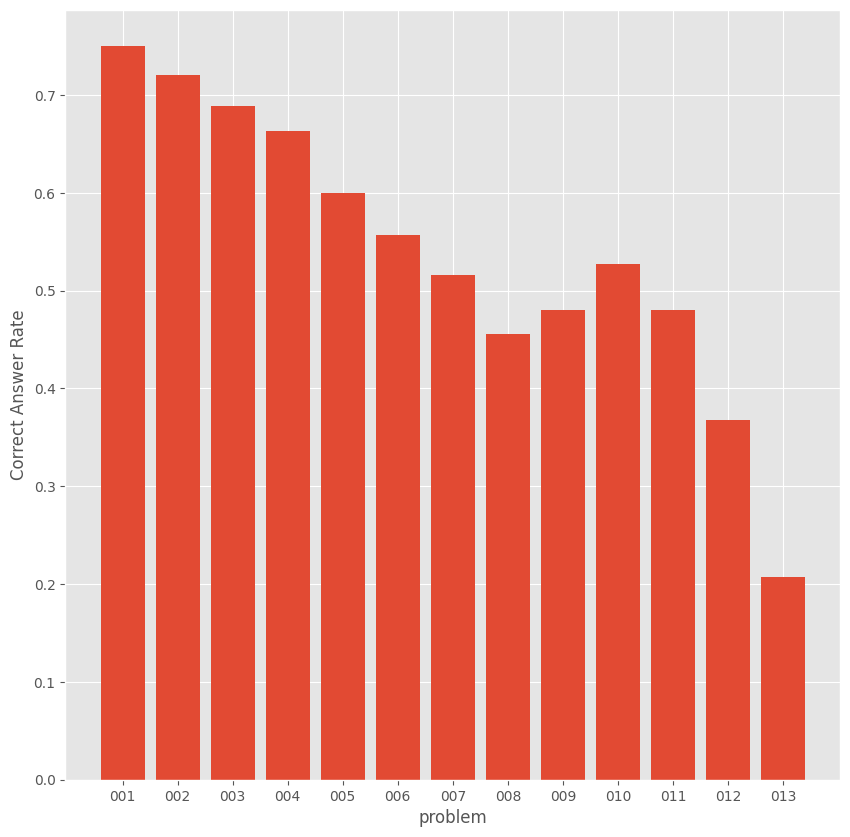

In [29]:
dat['problem'] = dat['assessmentItemID'].str[7:]
fig, ax = plt.subplots(figsize=(10, 10))
problems = dat.groupby('problem')['answerCode'].mean()
plt.bar(problems.index, problems)
ax.set_xlabel('problem')
ax.set_ylabel('Correct Answer Rate')